## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="SGD")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 22s 448us/step - loss: 2.0817 - acc: 0.2513 - val_loss: 2.0019 - val_acc: 0.2659
Epoch 2/500
50000/50000 [==============================] - 18s 360us/step - loss: 1.8960 - acc: 0.3324 - val_loss: 1.8744 - val_acc: 0.3226
Epoch 3/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.8212 - acc: 0.3608 - val_loss: 1.8093 - val_acc: 0.3614
Epoch 4/500
50000/50000 [==============================] - 19s 377us/step - loss: 1.7726 - acc: 0.3758 - val_loss: 1.7574 - val_acc: 0.3682
Epoch 5/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.7348 - acc: 0.3914 - val_loss: 1.7457 - val_acc: 0.3855
Epoch 6/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.7019 - acc: 0.4004 - val_loss: 1.7222 - val_acc: 0.3945
Epoch 7/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.6769 - acc: 0.4117 - val_l

50000/50000 [==============================] - 19s 379us/step - loss: 1.1877 - acc: 0.5848 - val_loss: 1.5208 - val_acc: 0.4668
Epoch 59/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.1828 - acc: 0.5852 - val_loss: 1.3653 - val_acc: 0.5183
Epoch 60/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.1775 - acc: 0.5880 - val_loss: 1.4703 - val_acc: 0.4795
Epoch 61/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.1720 - acc: 0.5910 - val_loss: 1.3842 - val_acc: 0.5137
Epoch 62/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.1645 - acc: 0.5914 - val_loss: 1.4129 - val_acc: 0.5042- acc
Epoch 63/500
50000/50000 [==============================] - 18s 367us/step - loss: 1.1632 - acc: 0.5928 - val_loss: 1.3772 - val_acc: 0.5186
Epoch 64/500
50000/50000 [==============================] - 19s 372us/step - loss: 1.1503 - acc: 0.5980 - val_loss: 1.3360 - val_acc: 0.5291
Epoch 65/500
50000/50

Epoch 116/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.8857 - acc: 0.6929 - val_loss: 1.6388 - val_acc: 0.4763
Epoch 117/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.8749 - acc: 0.6975 - val_loss: 1.4375 - val_acc: 0.5240
Epoch 118/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.8647 - acc: 0.7031 - val_loss: 1.5248 - val_acc: 0.4865
Epoch 119/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.8662 - acc: 0.6996 - val_loss: 1.5266 - val_acc: 0.5024
Epoch 120/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.8668 - acc: 0.7033 - val_loss: 1.3953 - val_acc: 0.5329
Epoch 121/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.8562 - acc: 0.7065 - val_loss: 1.5430 - val_acc: 0.4996
Epoch 122/500
50000/50000 [==============================] - 18s 350us/step - loss: 0.8565 - acc: 0.7027 - val_loss: 1.4572 - val_acc: 0.5192
Epoch 

Epoch 174/500
50000/50000 [==============================] - 18s 354us/step - loss: 0.6004 - acc: 0.7956 - val_loss: 1.6941 - val_acc: 0.4978
Epoch 175/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.5989 - acc: 0.7985 - val_loss: 1.5436 - val_acc: 0.5319
Epoch 176/500
50000/50000 [==============================] - 18s 353us/step - loss: 0.5921 - acc: 0.7998 - val_loss: 1.6297 - val_acc: 0.5190
Epoch 177/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.5795 - acc: 0.8044 - val_loss: 1.6895 - val_acc: 0.5051
Epoch 178/500
50000/50000 [==============================] - 18s 354us/step - loss: 0.5779 - acc: 0.8032 - val_loss: 1.5642 - val_acc: 0.5278
Epoch 179/500
50000/50000 [==============================] - 18s 354us/step - loss: 0.5800 - acc: 0.8031 - val_loss: 1.6098 - val_acc: 0.5177
Epoch 180/500
50000/50000 [==============================] - 18s 356us/step - loss: 0.5784 - acc: 0.8049 - val_loss: 2.0518 - val_acc: 0.4555
Epoch 

Epoch 232/500
50000/50000 [==============================] - 18s 351us/step - loss: 0.3298 - acc: 0.8956 - val_loss: 1.9610 - val_acc: 0.5208
Epoch 233/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.3816 - acc: 0.8787 - val_loss: 1.8462 - val_acc: 0.5308
Epoch 234/500
50000/50000 [==============================] - 18s 354us/step - loss: 0.3287 - acc: 0.8971 - val_loss: 1.8569 - val_acc: 0.5312
Epoch 235/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.3307 - acc: 0.8940 - val_loss: 2.0903 - val_acc: 0.4952
Epoch 236/500
50000/50000 [==============================] - 18s 360us/step - loss: 0.3239 - acc: 0.8977 - val_loss: 1.9080 - val_acc: 0.5263
Epoch 237/500
50000/50000 [==============================] - 18s 356us/step - loss: 0.3390 - acc: 0.8943 - val_loss: 1.8306 - val_acc: 0.5389
Epoch 238/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.3157 - acc: 0.9027 - val_loss: 2.0246 - val_acc: 0.5129
Epoch 

50000/50000 [==============================] - 18s 356us/step - loss: 0.1322 - acc: 0.9696 - val_loss: 2.1215 - val_acc: 0.5430
Epoch 290/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.1169 - acc: 0.9745 - val_loss: 2.1326 - val_acc: 0.5439
Epoch 291/500
50000/50000 [==============================] - 18s 351us/step - loss: 0.2173 - acc: 0.9454 - val_loss: 2.2799 - val_acc: 0.5312
Epoch 292/500
50000/50000 [==============================] - 18s 353us/step - loss: 0.2250 - acc: 0.9406 - val_loss: 2.1015 - val_acc: 0.5424
Epoch 293/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.2002 - acc: 0.9477 - val_loss: 2.3527 - val_acc: 0.5137
Epoch 294/500
50000/50000 [==============================] - 18s 353us/step - loss: 0.1227 - acc: 0.9712 - val_loss: 2.1938 - val_acc: 0.5340
Epoch 295/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.2180 - acc: 0.9453 - val_loss: 2.1308 - val_acc: 0.5429
Epoch 296/500
50000/

50000/50000 [==============================] - 19s 384us/step - loss: 0.0417 - acc: 0.9953 - val_loss: 2.4754 - val_acc: 0.5470
Epoch 347/500
50000/50000 [==============================] - 19s 382us/step - loss: 0.0392 - acc: 0.9958 - val_loss: 2.5071 - val_acc: 0.5425
Epoch 348/500
50000/50000 [==============================] - 19s 376us/step - loss: 0.1683 - acc: 0.9612 - val_loss: 2.4468 - val_acc: 0.5470
Epoch 349/500
50000/50000 [==============================] - 19s 374us/step - loss: 0.0412 - acc: 0.9958 - val_loss: 2.4750 - val_acc: 0.5465
Epoch 350/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.0406 - acc: 0.9952 - val_loss: 2.4694 - val_acc: 0.5517
Epoch 351/500
50000/50000 [==============================] - 19s 380us/step - loss: 0.0358 - acc: 0.9967 - val_loss: 2.5154 - val_acc: 0.5432
Epoch 352/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.0359 - acc: 0.9963 - val_loss: 2.4891 - val_acc: 0.5486
Epoch 353/500
50000/

50000/50000 [==============================] - 18s 355us/step - loss: 0.0152 - acc: 0.9996 - val_loss: 2.7545 - val_acc: 0.5476
Epoch 404/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0148 - acc: 0.9995 - val_loss: 2.7422 - val_acc: 0.5492
Epoch 405/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0144 - acc: 0.9996 - val_loss: 2.7558 - val_acc: 0.5473
Epoch 406/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0146 - acc: 0.9995 - val_loss: 2.7862 - val_acc: 0.5460
Epoch 407/500
50000/50000 [==============================] - 17s 350us/step - loss: 0.0143 - acc: 0.9996 - val_loss: 2.7677 - val_acc: 0.5471
Epoch 408/500
50000/50000 [==============================] - 18s 351us/step - loss: 0.0137 - acc: 0.9997 - val_loss: 2.7704 - val_acc: 0.5507
Epoch 409/500
50000/50000 [==============================] - 18s 367us/step - loss: 0.0136 - acc: 0.9997 - val_loss: 2.7881 - val_acc: 0.5463
Epoch 410/500
50000/

Epoch 461/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 2.9739 - val_acc: 0.5463
Epoch 462/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 2.9673 - val_acc: 0.5466
Epoch 463/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0075 - acc: 0.9999 - val_loss: 2.9706 - val_acc: 0.5468
Epoch 464/500
50000/50000 [==============================] - 18s 350us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9782 - val_acc: 0.5469
Epoch 465/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9802 - val_acc: 0.5490
Epoch 466/500
50000/50000 [==============================] - 18s 351us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.9801 - val_acc: 0.5474
Epoch 467/500
50000/50000 [==============================] - 18s 353us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 2.9829 - val_acc: 0.5464
Epoch 

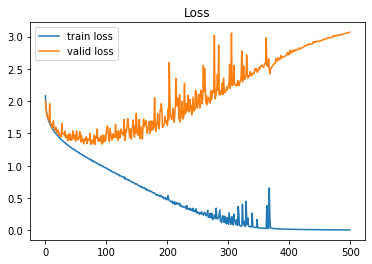

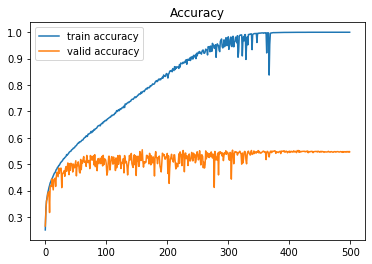

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()